In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from src.pmf import PMF

In [2]:
ratings = pd.read_csv('ratings_real.csv')

print('Number of Users: ', ratings.user_id.nunique())
print('Number of Anime: ', ratings.anime_id.nunique())
print('Number of Ratings: ', len(ratings))
ratings = ratings.to_numpy()

Number of Users:  69600
Number of Anime:  9927
Number of Ratings:  6337241


In [3]:
pmf = PMF()
pmf.set_params({"num_feat": 30, "epsilon": 1, "_lambda": 0.1, "momentum": 0.8, "maxepoch": 600, "num_batches": 100,
                "batch_size": 1000})
print(len(np.unique(ratings[:, 0])), len(np.unique(ratings[:, 1])), pmf.num_feat)
train, test = train_test_split(ratings, test_size=0.2)  
pmf.fit(train, test)

69600 9927 30
The epoch: 1.000000, Training RMSE: 1.573199, Test RMSE 1.573711
The epoch: 2.000000, Training RMSE: 1.572973, Test RMSE 1.573634
The epoch: 3.000000, Training RMSE: 1.572772, Test RMSE 1.573577
The epoch: 4.000000, Training RMSE: 1.572589, Test RMSE 1.573549
The epoch: 5.000000, Training RMSE: 1.572419, Test RMSE 1.573527
The epoch: 6.000000, Training RMSE: 1.572255, Test RMSE 1.573483
The epoch: 7.000000, Training RMSE: 1.572105, Test RMSE 1.573451
The epoch: 8.000000, Training RMSE: 1.571956, Test RMSE 1.573423
The epoch: 9.000000, Training RMSE: 1.571813, Test RMSE 1.573389
The epoch: 10.000000, Training RMSE: 1.571676, Test RMSE 1.573359
The epoch: 11.000000, Training RMSE: 1.571541, Test RMSE 1.573318
The epoch: 12.000000, Training RMSE: 1.571409, Test RMSE 1.573281
The epoch: 13.000000, Training RMSE: 1.571271, Test RMSE 1.573235
The epoch: 14.000000, Training RMSE: 1.571128, Test RMSE 1.573189
The epoch: 15.000000, Training RMSE: 1.570981, Test RMSE 1.573138
The e

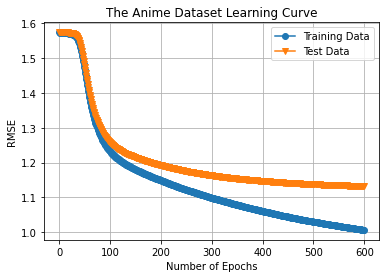

In [5]:
# Check performance by plotting train and test errors
plt.plot(range(pmf.maxepoch), pmf.rmse_train, marker='o', label='Training Data')
plt.plot(range(pmf.maxepoch), pmf.rmse_test, marker='v', label='Test Data')
plt.title('The Anime Dataset Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()